In [1]:
from dask.distributed import Client

client = Client()
display(client)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 31.28 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41755,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 31.28 GiB
Comm: tcp://127.0.0.1:42669,Total threads: 3
Dashboard: http://127.0.0.1:36861/status,Memory: 7.82 GiB
Nanny: tcp://127.0.0.1:40875,


## Dask delayed()

This is a toy example with two very simple functions that do some basic calculations and sleep for a while to simulate work.

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time
x = inc(5)
y = inc(10)
z = add(x,y)

CPU times: user 272 ms, sys: 98.7 ms, total: 371 ms
Wall time: 3 s


The two increment calls can be executed in parallel as they are independent one of the other.

In [5]:
from dask import delayed
x = delayed(inc)(5)
y = delayed(inc)(10)
z = delayed(add)(x, y)

In [6]:
%%time
z.compute()

CPU times: user 245 ms, sys: 97.6 ms, total: 343 ms
Wall time: 2.11 s


17

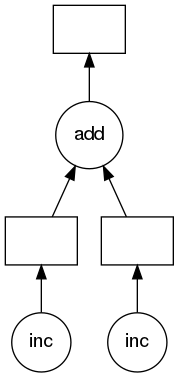

In [7]:
z.visualize()

A similar example:

In [8]:
def square(x):
    sleep(1)
    return x*x

def double(x):
    sleep(1)
    return x*2

def add(x, y):
    sleep(1)
    return x + y

In [9]:
%%time
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total= sum(output)

CPU times: user 1.29 s, sys: 589 ms, total: 1.88 s
Wall time: 18 s


CPU times: user 281 ms, sys: 61.5 ms, total: 343 ms
Wall time: 2.17 s


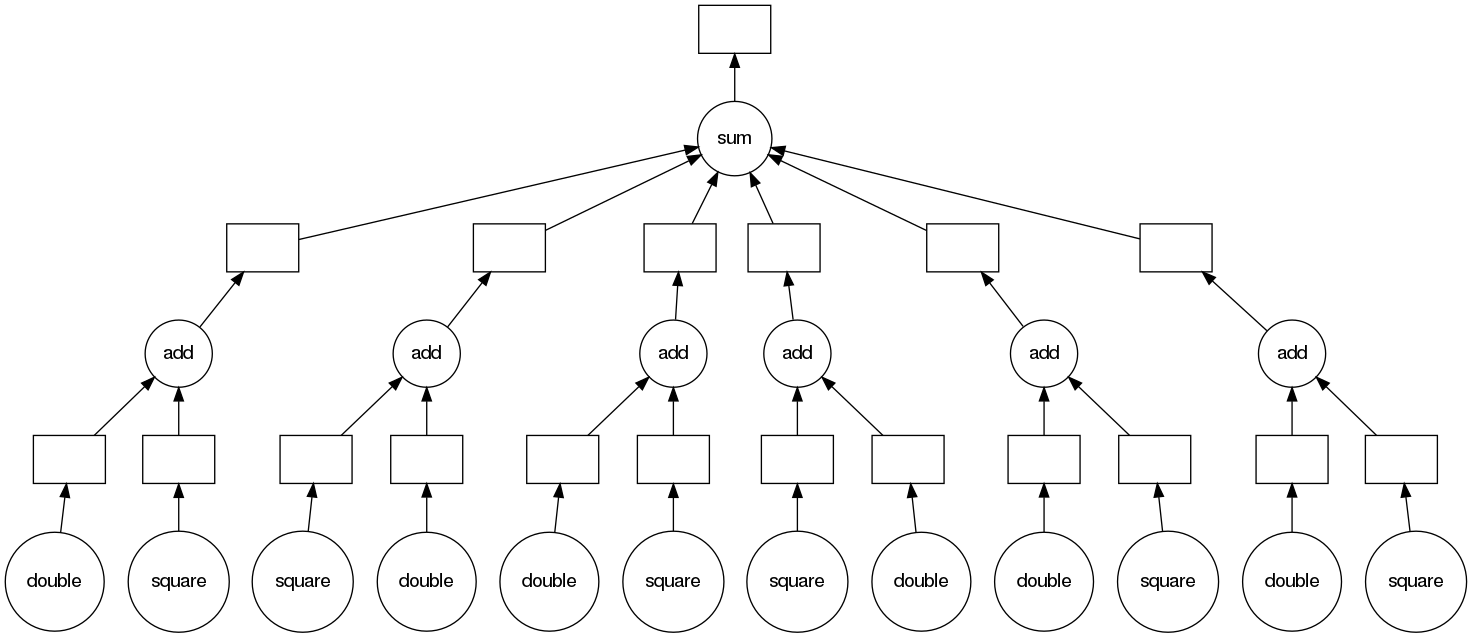

In [10]:
%%time
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

total= delayed(sum)(output)
total.compute()
total.visualize()

You can also define at the beginning that it is a delayed funcion.

In [12]:
@delayed
def square(x):
    sleep(1)
    return x*x
@delayed
def double(x):
    sleep(1)
    return x*2
@delayed
def add(x, y):
    sleep(1)
    return x + y

In [19]:
%%time
import dask

output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)
    
l = dask.compute(*output) 

CPU times: user 236 ms, sys: 62.7 ms, total: 299 ms
Wall time: 2.08 s


Check out also https://docs.dask.org/en/stable/delayed-best-practices.html